In [114]:
import pandas as pd
import numpy as np
da = pd.read_csv('/content/CarPrice_Assignment.csv')
da.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


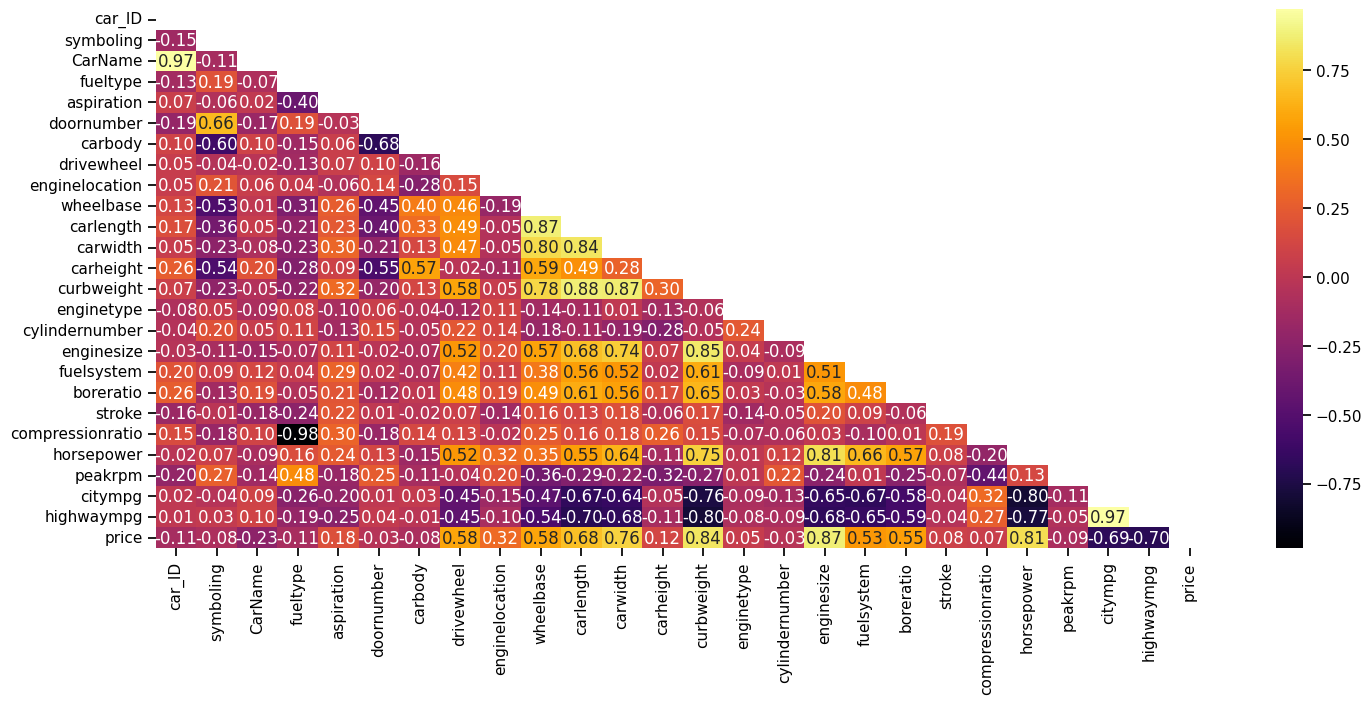

In [115]:
dfx = da.copy()
cat = []
num = []

for n,d in dfx.items():
    if d.dtype == 'object':
        cat.append(n)
    else:
        num.append(n)

dfx = da.copy()
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

for i in cat:
    dfx[i] = le.fit_transform(dfx[i])

ss = StandardScaler()

for i in num:
    dfx[i] = ss.fit_transform(dfx[[i]])

import matplotlib.pyplot as plt
import seaborn as sns

corr= dfx.corr()
matrix = np.triu(corr)
plt.figure(figsize = (17,7))
sns.heatmap(corr, annot=True, mask=matrix, fmt = ".2f", cmap = 'inferno');

In [116]:
abs(corr['price']).sort_values(ascending = False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
drivewheel          0.577992
wheelbase           0.577816
boreratio           0.553173
fuelsystem          0.526823
enginelocation      0.324973
CarName             0.231439
aspiration          0.177926
carheight           0.119336
car_ID              0.109093
fueltype            0.105679
peakrpm             0.085267
carbody             0.083976
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
doornumber          0.031835
cylindernumber      0.027628
Name: price, dtype: float64

In [117]:
X = da.drop(['price'], axis = 1)
y = da[['price']]

In [118]:
cat = []
num = []

for n,d in X.items():
    if d.dtype == 'object':
        cat.append(n)
    else:
        num.append(n)

print(f'categorical columns : {cat}')
print(f'numerical columns : {num}')

categorical columns : ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
numerical columns : ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [119]:
X1 = X.copy()
X1['enginesize'].loc[np.random.randint(153, size=30)] = np.nan
X1.isnull().sum()

<ipython-input-119-7d4b0c0904f2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



car_ID               0
symboling            0
CarName              0
fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       0
enginesize          27
fuelsystem           0
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
dtype: int64

In [120]:
es_mean = X1['enginesize'].mean()

X11 = X1.copy()
X11 = X11.fillna(value=0)
X12 = X1.copy()
X12 = X12.fillna(value=es_mean)
X13 = X1.copy()
X13 = X13.dropna()

In [121]:
for Q in [X,X11,X12,X13]:
    le = LabelEncoder()
    for i in cat:
        Q[i] = le.fit_transform(Q[i])
    ss = StandardScaler()
    for i in num:
        Q[i] = ss.fit_transform(Q[[i]])

In [122]:
import pprint
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

lr = LinearRegression()

def model_eval(m,X,y):
    a,d,s,f = train_test_split(X,y)
    m.fit(a,s)
    g = m.predict(d)
    print(m)
    print(f'mae\t: {round(mean_absolute_error(f,g),4)}')
    print(f'rmse\t: {round(np.sqrt(mean_squared_error(f,g)),4)}')
    print(f'r2\t: {round(r2_score(f,g),4)}')

def model_cv(m,X,y):
    scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
    scores = cross_validate(m, X, y, scoring=scoring, cv=15, return_train_score=False)
    for k,v in scores.items():
        print(f'{k}  :{round(v.mean(),4)}')

In [123]:
des = ['without null values :', 'null values replaced by 0 :', 'null values replaced by mean :']

j = 0
for i in [X,X11,X12]:
    print(des[j])
    j+=1
    model_eval(lr,i,y)
    print('cv\t:')
    model_cv(lr,i,y)
    print('\n')

without null values :
LinearRegression()
mae	: 2837.749
rmse	: 4040.736
r2	: 0.8228
cv	:
fit_time  :0.0086
score_time  :0.0101
test_neg_mean_absolute_error  :-2849.3772
test_neg_root_mean_squared_error  :-3699.4745
test_r2  :-0.8592


null values replaced by 0 :
LinearRegression()
mae	: 2135.8871
rmse	: 3450.9957
r2	: 0.7899
cv	:
fit_time  :0.0078
score_time  :0.0091
test_neg_mean_absolute_error  :-2965.2994
test_neg_root_mean_squared_error  :-3864.5282
test_r2  :-0.804


null values replaced by mean :
LinearRegression()
mae	: 2253.9388
rmse	: 2826.9118
r2	: 0.8665
cv	:
fit_time  :0.0077
score_time  :0.0092
test_neg_mean_absolute_error  :-2870.0546
test_neg_root_mean_squared_error  :-3804.4822
test_r2  :-0.9121


